In [47]:
import numpy as np
import pandas as pd
df = pd.read_csv('metro_CA_2011_2018_lagged_genindex.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['rent_in_5y', 'rent_in_4y', 'rent_in_3y', 'rent_in_2y'])
df[df == np.inf] = np.nan
df = df.fillna(method='ffill')
df.isnull().sum()

year                                            0
aggregate_travel_time_to_work                   0
amerindian_including_hispanic                   0
amerindian_pop                                  0
armed_forces                                    0
                                               ..
different_house_year_ago_all_pct_change         0
rank_different_house_year_ago_all_pct_change    0
rank_gini_index                                 0
gini_index_pct_change                           0
gen_rank                                        0
Length: 262, dtype: int64

In [48]:
#prepare data to modeling 
features_test = df.loc[df['year'] == 2018]
features_train = df.loc[df['year'] != 2018]
labels_train = features_train['rent_in_1y']
labels_test = features_test['rent_in_1y']
features_train = features_train.drop('rent_in_1y', axis = 1)
features_test = features_test.drop('rent_in_1y', axis = 1)

In [49]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(features_train, labels_train);

In [50]:
rf.score(features_train, labels_train)

0.997611414237112

In [51]:
rf.score(features_test, labels_test)

0.9882326408432108

<BarContainer object of 20 artists>

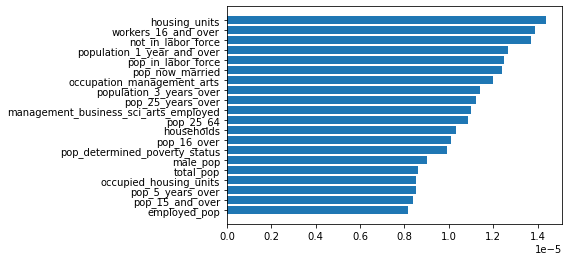

In [65]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(features_test.columns[sorted_idx][:20], rf.feature_importances_[sorted_idx][:20])

In [67]:
features_train.to_csv('features_train_metro_lagged.csv', index=False)
features_test.to_csv('features_test_metro_lagged.csv', index=False)
labels_train.to_csv('labels_train_metro_lagged.csv', index=False)
labels_test.to_csv('labels_test_metro_lagged.csv', index=False)